In [17]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
tf.InteractiveSession()


# Lower Back Pain Symptoms Dataset
Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

The large nerve roots in the low back that go to the legs may be irritated
The smaller nerves that supply the low back may be irritated
The large paired lower back muscles (erector spinae) may be strained
The bones, ligaments or joints may be damaged
An intervertebral disc may be degenerating
An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

This data set is about to identify a person is abnormal or normal using collected physical spine details/data.

In [31]:
data = pd.read_csv("Dataset_spine.csv")

In [32]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [33]:
data.shape

(310, 14)

In [34]:
data = data.drop(['Unnamed: 13'], axis = 1)

In [35]:
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [71]:
data.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


    Col1 : pelvic_incidence
    Col2 : pelvic tilt
    Col3 : lumbar_lordosis_angle
    Col4 : sacral_slope
    Col5 : pelvic_radius
    Col6 : degree_spondylolisthesis
    Col7 : pelvic_slope
    Col8 : Direct_tilt
    Col9 : thoracic_slope
    Col10: cervical_tilt
    Col11: sacrum_angle
    Col12s: coliosis_slope
    Class_att: Abnormal, Normal

In [36]:
data.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

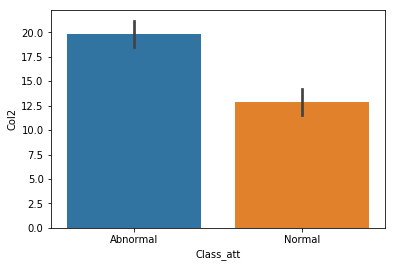

In [39]:
sns.barplot(x=data['Class_att'], y=data['Col2'])

In [45]:
data['Class_att'].unique()


array(['Abnormal', 'Normal'], dtype=object)

In [46]:
def replace(x):
    if(x=="Abnormal"):
        return 1
    else:
        return 0

In [47]:
data['Class_att'] = data['Class_att'].apply(replace)

In [48]:
print(data['Class_att'].unique())

[1 0]


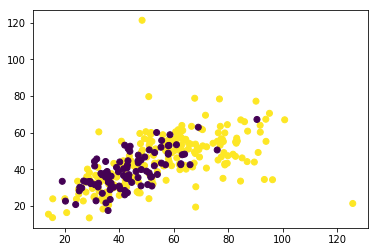

In [51]:
plt.scatter(x=data['Col3'],y=data['Col4'],c=data['Class_att'])

In [63]:
XOR_X = []
XOR_Y = []
for i in range(data.shape[0]):
    l = []
    for j in range(data.shape[1]):
        if(j!=data.shape[1]-1):
            l.append(data.iloc[i,j])
        else:
            XOR_Y.append([data.iloc[i,j]])
    XOR_X.append(l)
print(XOR_Y)
print(XOR_X) 

                     

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],

In [72]:
#----------------------------------------------------------------------------------------------
#XOR  implementation in Tensorflow with hidden layers being sigmoid to introduce Non-Linearity
#----------------------------------------------------------------------------------------------
import tensorflow as tf
#----------------------------------------------------------------------------------------------
# Create placeholders for training input and output labels
#----------------------------------------------------------------------------------------------
x_ = tf.placeholder(tf.float32, shape=[data.shape[0],data.shape[1]-1], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[data.shape[0],1], name="y-input")
#----------------------------------------------------------------------------------------------
#Define the weights to the hidden and output layerrespectively. 
#----------------------------------------------------------------------------------------------
w1 = tf.Variable(tf.random_uniform([data.shape[1]-1,data.shape[1]-1], -1, 1), name="Weights1")
w2 = tf.Variable(tf.random_uniform([data.shape[1]-1,1], -1, 1), name="Weights2")
#----------------------------------------------------------------------------------------------
# Define the bias to the hidden and output layers respectively
#----------------------------------------------------------------------------------------------
b1 = tf.Variable(tf.zeros([data.shape[1]-1]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
#----------------------------------------------------------------------------------------------
# Define the final output through forward pass
#----------------------------------------------------------------------------------------------
z2 = tf.sigmoid(tf.matmul(x_, w1) + b1)
pred = tf.sigmoid(tf.matmul(z2,w2) + b2)
#----------------------------------------------------------------------------------------------
#Define the Cross-entropy/Log-loss Cost function based on the output label y and the predicted 
#probability by the forward pass
#----------------------------------------------------------------------------------------------
cost = tf.reduce_mean(( (y_ * tf.log(pred)) + 
        ((1 - y_) * tf.log(1.0 - pred)) ) * -1)
learning_rate = 0.01
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
#----------------------------------------------------------------------------------------------
#Now that we have all that we need set up we will start the training
#----------------------------------------------------------------------------------------------
#XOR_X = [[0,0],[0,1],[1,0],[1,1]]
#XOR_Y = [[0],[1],[1],[0]]

init = tf.initialize_all_variables()
sess = tf.Session()
writer = tf.summary.FileWriter("./Downloads/XOR1_logs", sess.graph_def)

sess.run(init)
for i in range(100000):
        sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})
        if i % 10000 == 0:
            print('Epoch ', i)
            print('Prediction:', sess.run(pred,feed_dict={x_: XOR_X, y_: XOR_Y}))
            print('Weights from input to hidden layer:', sess.run(w1))
            print('Bias in the hidden layer:', sess.run(b1))
            print('Weights from hidden layer to output layer:', sess.run(w2))
            print('Bias in the output layer:', sess.run(b2))
            print('Cost:', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))
#----------------------------------------------------------------------------------------------        
print('Final Prediction', sess.run(pred, feed_dict={x_: XOR_X, y_: XOR_Y}), end=" ")
#----------------------------------------------------------------------------------------------

Epoch  0
Prediction: [[0.20206685]
 [0.111058  ]
 [0.13983572]
 [0.38076466]
 [0.111054  ]
 [0.11105403]
 [0.11203322]
 [0.11105403]
 [0.11112572]
 [0.21744949]
 [0.11105362]
 [0.16033167]
 [0.11104742]
 [0.11104823]
 [0.1201636 ]
 [0.11105722]
 [0.09953529]
 [0.11105727]
 [0.11105403]
 [0.11105403]
 [0.11105405]
 [0.11096226]
 [0.3206459 ]
 [0.11105403]
 [0.11105407]
 [0.11102439]
 [0.15948361]
 [0.11248218]
 [0.11110784]
 [0.10201897]
 [0.24503186]
 [0.20245047]
 [0.11090592]
 [0.11105403]
 [0.09408518]
 [0.11225368]
 [0.11105403]
 [0.11106791]
 [0.11253563]
 [0.10394736]
 [0.11105405]
 [0.11105421]
 [0.11907598]
 [0.09408717]
 [0.23918614]
 [0.11099838]
 [0.1110533 ]
 [0.11105405]
 [0.11105403]
 [0.11105405]
 [0.09408493]
 [0.09408429]
 [0.1110527 ]
 [0.11134387]
 [0.11105403]
 [0.2014238 ]
 [0.11106374]
 [0.11105403]
 [0.11105403]
 [0.11105398]
 [0.38073853]
 [0.33191237]
 [0.23305273]
 [0.38080353]
 [0.38080353]
 [0.38080305]
 [0.38080308]
 [0.37908325]
 [0.42513505]
 [0.38613677]

Epoch  20000
Prediction: [[0.4400601 ]
 [0.8990838 ]
 [0.43922794]
 [0.96043366]
 [0.22400753]
 [0.7062137 ]
 [0.22610842]
 [0.22400339]
 [0.22479537]
 [0.22400597]
 [0.2242598 ]
 [0.7117256 ]
 [0.7116935 ]
 [0.69796336]
 [0.6390078 ]
 [0.841234  ]
 [0.39827755]
 [0.22400288]
 [0.25669748]
 [0.25136817]
 [0.2240533 ]
 [0.6969875 ]
 [0.94100714]
 [0.22402735]
 [0.7117234 ]
 [0.71172476]
 [0.71171707]
 [0.22413237]
 [0.7117251 ]
 [0.44028404]
 [0.96060455]
 [0.43687153]
 [0.7117071 ]
 [0.6562535 ]
 [0.85967153]
 [0.82463837]
 [0.22412251]
 [0.7117256 ]
 [0.7116391 ]
 [0.24269329]
 [0.71171993]
 [0.22400382]
 [0.898225  ]
 [0.8564737 ]
 [0.4349182 ]
 [0.68319553]
 [0.7117241 ]
 [0.70883685]
 [0.7099921 ]
 [0.7117248 ]
 [0.7058859 ]
 [0.71173716]
 [0.7117256 ]
 [0.86349314]
 [0.2240756 ]
 [0.8967212 ]
 [0.6981253 ]
 [0.22496484]
 [0.65673435]
 [0.7083129 ]
 [0.9977816 ]
 [0.9977857 ]
 [0.8999623 ]
 [0.96064395]
 [0.43930063]
 [0.99780375]
 [0.96065503]
 [0.98398757]
 [0.43947765]
 [0.96064

Epoch  40000
Prediction: [[0.36278978]
 [0.8947287 ]
 [0.3467923 ]
 [0.9626636 ]
 [0.15678436]
 [0.6148117 ]
 [0.15716915]
 [0.15678377]
 [0.54380655]
 [0.15704872]
 [0.15679544]
 [0.8535237 ]
 [0.8535209 ]
 [0.7577017 ]
 [0.9324587 ]
 [0.8992832 ]
 [0.3165581 ]
 [0.15678377]
 [0.57327884]
 [0.4623817 ]
 [0.1567899 ]
 [0.84640133]
 [0.9566431 ]
 [0.15678385]
 [0.8535235 ]
 [0.8535237 ]
 [0.85352314]
 [0.1569651 ]
 [0.8535237 ]
 [0.3463888 ]
 [0.9626446 ]
 [0.34564826]
 [0.85352194]
 [0.8481993 ]
 [0.9329458 ]
 [0.8059046 ]
 [0.17366919]
 [0.8535237 ]
 [0.8531602 ]
 [0.80587375]
 [0.85351795]
 [0.15678397]
 [0.8994586 ]
 [0.9236107 ]
 [0.3388519 ]
 [0.83384067]
 [0.85352355]
 [0.85155   ]
 [0.8273767 ]
 [0.85349584]
 [0.8513671 ]
 [0.85352546]
 [0.8535237 ]
 [0.8537262 ]
 [0.15678447]
 [0.92327917]
 [0.8395457 ]
 [0.15689431]
 [0.84480774]
 [0.8534015 ]
 [0.9996712 ]
 [0.9996712 ]
 [0.9778202 ]
 [0.98366946]
 [0.34679514]
 [0.9996712 ]
 [0.98850876]
 [0.9996712 ]
 [0.34694314]
 [0.98748

Epoch  60000
Prediction: [[0.35769284]
 [0.8840989 ]
 [0.3495436 ]
 [0.9628334 ]
 [0.14904922]
 [0.65222895]
 [0.14931388]
 [0.14904922]
 [0.5576724 ]
 [0.14911613]
 [0.1490509 ]
 [0.87150925]
 [0.87150884]
 [0.8067697 ]
 [0.9482322 ]
 [0.8938045 ]
 [0.33019882]
 [0.14904922]
 [0.59964675]
 [0.46422592]
 [0.14905055]
 [0.86788094]
 [0.96798867]
 [0.14904922]
 [0.87150925]
 [0.8715099 ]
 [0.8715092 ]
 [0.14908104]
 [0.87150925]
 [0.3484761 ]
 [0.96280944]
 [0.34677276]
 [0.8715074 ]
 [0.8681873 ]
 [0.937837  ]
 [0.8324962 ]
 [0.15824905]
 [0.87150925]
 [0.8713679 ]
 [0.8393777 ]
 [0.8715085 ]
 [0.14904922]
 [0.89380926]
 [0.94055724]
 [0.3428726 ]
 [0.8539857 ]
 [0.87150925]
 [0.8703837 ]
 [0.85456836]
 [0.8715043 ]
 [0.8690691 ]
 [0.8715113 ]
 [0.87150925]
 [0.87153465]
 [0.14904928]
 [0.95562685]
 [0.85217226]
 [0.14908092]
 [0.8666168 ]
 [0.87147444]
 [0.99981576]
 [0.99981576]
 [0.97671324]
 [0.9910262 ]
 [0.34954625]
 [0.99981576]
 [0.99246687]
 [0.99981576]
 [0.34963685]
 [0.99227

Epoch  80000
Prediction: [[0.80160797]
 [0.85127985]
 [0.29914245]
 [0.9953939 ]
 [0.63877475]
 [0.72821206]
 [0.13283987]
 [0.13268031]
 [0.7729319 ]
 [0.13274871]
 [0.13268076]
 [0.8594813 ]
 [0.8603599 ]
 [0.79303217]
 [0.93522406]
 [0.8609433 ]
 [0.2899204 ]
 [0.13268031]
 [0.6229483 ]
 [0.44966897]
 [0.13268088]
 [0.8562885 ]
 [0.978297  ]
 [0.13268031]
 [0.8594712 ]
 [0.8594725 ]
 [0.859471  ]
 [0.6495863 ]
 [0.9868754 ]
 [0.29842994]
 [0.9453119 ]
 [0.2935855 ]
 [0.88042486]
 [0.8545578 ]
 [0.93274605]
 [0.8182408 ]
 [0.13748635]
 [0.8594732 ]
 [0.85935074]
 [0.9781804 ]
 [0.8594709 ]
 [0.13268031]
 [0.860995  ]
 [0.92567915]
 [0.29509392]
 [0.84566706]
 [0.8594711 ]
 [0.8590991 ]
 [0.84314287]
 [0.85946965]
 [0.8558783 ]
 [0.9775354 ]
 [0.9871061 ]
 [0.85948026]
 [0.13268031]
 [0.9380782 ]
 [0.83204025]
 [0.13268767]
 [0.8563269 ]
 [0.85945517]
 [0.9998845 ]
 [0.9998845 ]
 [0.97735023]
 [0.99540085]
 [0.7910828 ]
 [0.9998845 ]
 [0.99539715]
 [0.9998845 ]
 [0.29919896]
 [0.99539

Final Prediction [[0.8730691 ]
 [0.8256566 ]
 [0.2857148 ]
 [0.99725765]
 [0.7948561 ]
 [0.7578992 ]
 [0.1328672 ]
 [0.13274156]
 [0.8132646 ]
 [0.13291462]
 [0.13271806]
 [0.86072326]
 [0.8617529 ]
 [0.77469563]
 [0.9218055 ]
 [0.8349799 ]
 [0.2788474 ]
 [0.13274156]
 [0.6503615 ]
 [0.48774958]
 [0.13274182]
 [0.8574948 ]
 [0.984097  ]
 [0.13274156]
 [0.86071956]
 [0.8607223 ]
 [0.86071956]
 [0.8017512 ]
 [0.9940813 ]
 [0.28524315]
 [0.92971015]
 [0.28045896]
 [0.8868786 ]
 [0.8534441 ]
 [0.9337193 ]
 [0.8028181 ]
 [0.13647236]
 [0.86072016]
 [0.86063236]
 [0.9814192 ]
 [0.86071956]
 [0.13274156]
 [0.83512086]
 [0.9205595 ]
 [0.2829032 ]
 [0.8496413 ]
 [0.86071956]
 [0.86058825]
 [0.8409906 ]
 [0.8607189 ]
 [0.85398453]
 [0.9907901 ]
 [0.99415296]
 [0.86072266]
 [0.1327416 ]
 [0.9234732 ]
 [0.81205374]
 [0.13274309]
 [0.8586705 ]
 [0.86070395]
 [0.99993193]
 [0.99993193]
 [0.9846364 ]
 [0.9972601 ]
 [0.88014525]
 [0.99993193]
 [0.99725926]
 [0.99993193]
 [0.28575617]
 [0.99725914]
 [0

13

int